# Курс Data Science
## 15.10. Домашнее задание 

### 10.1 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [74]:
import pickle
import numpy as np

# данные получены с помощью функции make_classification 
with open('data/clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

In [75]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

model = KMeans(n_clusters=4).fit(X)


In [76]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, model.labels_)
print(f"Качество кластеризации по метрике Силуэтта {score:.3f}")

Качество кластеризации по метрике Силуэтта 0.442


Метрика Силуэтта на модели KMeans с 4 кластерами показывает хуже результат, чем с 2 кластерами


### 10.2 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [77]:
from sklearn.metrics import adjusted_mutual_info_score
score = adjusted_mutual_info_score(Y, model.labels_, average_method='arithmetic')
print(f"Качество кластеризации по метрике AMI {score:.3f}")

Качество кластеризации по метрике AMI 0.583



### 10.3 Домашнее задание высокого уровня

Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

In [78]:
import pandas as pd

data = pd.read_csv('data/clustering_hw.csv')
data.head(5)


,x1,x2,y
0,6.221343,4.968753,2
1,7.360892,8.857455,2
2,-0.108178,4.730723,1
3,3.127358,1.927986,0
4,-0.817259,6.759974,1


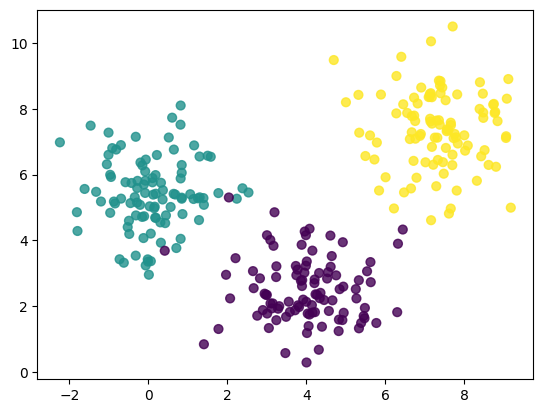

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(data['x1'], data['x2'], s=40, c=data['y'], marker='o', alpha=0.8)
plt.show()

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI

In [80]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
model = KMeans(n_clusters=3).fit(data[['x1','x2']])


In [81]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
score = adjusted_mutual_info_score(data['y'], model.labels_, average_method='arithmetic')
print(f"Качество кластеризации по метрике AMI {score:.3f}")

Качество кластеризации по метрике AMI 0.970


In [82]:
X = np.array([[5,8],[0,5]])
y = model.predict(X)
print(f'Точка {X[0]} кластер {y[0]}')
print(f'Точка {X[1]} кластер {y[1]}')


Точка [5 8] кластер 0
Точка [0 5] кластер 1


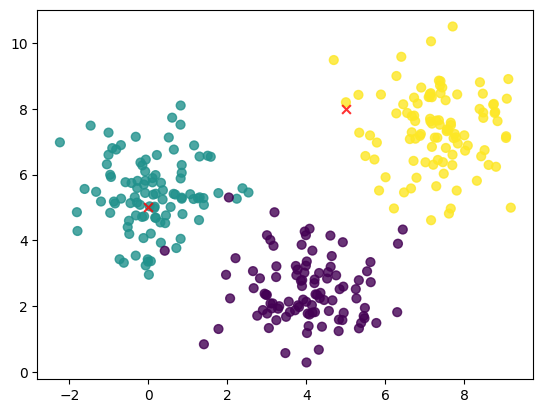

In [83]:
plt.scatter(data['x1'], data['x2'], s=40, c=data['y'], marker='o', alpha=0.8)
plt.scatter([5,0],[8,5], s=40, c='red', marker='x', alpha=0.8)
plt.show()

### Заключение

Мы познакомились с двумя метриками

* Silhouette. Её используем, когда есть только сами объекты, а метки кластеров отсутствуют в обучающей выборке
* AMI. Её используем, когда известны "истинные" метки кластеров

Метрик намного больше - о них можно почитать [ в документации sklearn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)